In [21]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

###  handling missing data
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

### libraries for feature selection 
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2, f_regression, f_classif
from sklearn.feature_selection import SelectKBest

In [2]:
pd.set_option('display.max_columns', None)
dataset = pd.read_excel('ML_Data_Return_Updated_Repeat.xlsx', na_values   = "?")
dataset

,ID_Record,ID,Entry ID,Strategic Sale,Destination,Group,Date,Sequence,Product,QTY,Total Value,Unit Price,Planned Date,Delivered Date,TYPE,Qty Delivered,Order Source,Logistic Partner,Deposit,Replacement,Market Demand,Quarter,Week,Strateg Prod,Strat Customer,ABC,Customer Group
0,1,1140,17592,1,NaN,7,2021-01-23,8,4482,325.0,112.50,0.346154,2021-02-22,2023-02-14,RETURN,250.0,Channel1,C2,L2,NO,2,2022Q3,4,0,YES,C,176
1,2,1140,17899,1,NaN,7,2021-05-01,1,4486,2860.0,550.00,0.192308,2021-05-03,2023-05-16,RETURN,2200.0,Channel1,C2,L2,NO,2,2022Q3,9,0,YES,C,176
2,3,1320,18072,0,NL,2,2021-06-26,77,4440,39.0,214.20,5.492308,2021-06-26,2023-07-02,SALE,30.0,Channel2,C6,L9,NO,3,2022Q4,1,0,No,C,3986
3,4,340,18181,1,US,2,2021-08-02,11,4440,80.6,442.68,5.492308,2021-08-02,2023-08-16,SALE,62.0,Channel2,C2,L2,NO,1,2022Q3,9,0,No,C,684
4,5,1100,18335,1,DE,7,2021-09-13,2,4481,325.0,622.50,1.915385,2023-07-16,2023-07-09,SALE,250.0,Channel2,C6,L9,NO,3,2022Q4,12,0,No,C,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15886,340,19580,1,US,25,2022-12-04,3,4493,1.3,3.20,2.461538,2022-12-04,2023-02-27,SALE,1.0,Channel2,C7,L8,YES,1,2022Q3,1,0,No,NaN,684
15886,15887,340,19580,1,US,21,2022-12-04,1,4493,10.4,25.60,2.461538,2022-12-04,2022-12-20,SALE,8.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15887,15888,340,19580,1,US,17,2022-12-04,4,4467,11.7,42.39,3.623077,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684
15888,15889,340,19580,1,US,17,2022-12-04,4,4467,11.7,42.39,3.623077,2022-12-04,2023-01-17,SALE,9.0,Channel2,C12,L12,NO,1,2022Q3,1,0,No,NaN,684


In [3]:
dataset.isnull().sum()

ID_Record             0
ID                    0
Entry ID              0
Strategic Sale        0
Destination         704
Group                 0
Date                  0
Sequence              0
Product               0
QTY                   0
Total Value         252
Unit Price          224
Planned Date          0
Delivered Date      319
TYPE                  0
Qty Delivered       319
Order Source          0
Logistic Partner      0
Deposit               0
Replacement           0
Market Demand         0
Quarter               0
Week                  0
Strateg Prod          0
Strat Customer        0
ABC                 429
Customer Group        0
dtype: int64

In [4]:
dataset.dtypes

ID_Record                    int64
ID                           int64
Entry ID                     int64
Strategic Sale               int64
Destination                 object
Group                        int64
Date                datetime64[ns]
Sequence                     int64
Product                      int64
QTY                        float64
Total Value                float64
Unit Price                 float64
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
TYPE                        object
Qty Delivered              float64
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                 object
Market Demand                int64
Quarter                     object
Week                         int64
Strateg Prod                 int64
Strat Customer              object
ABC                         object
Customer Group               int64
dtype: object

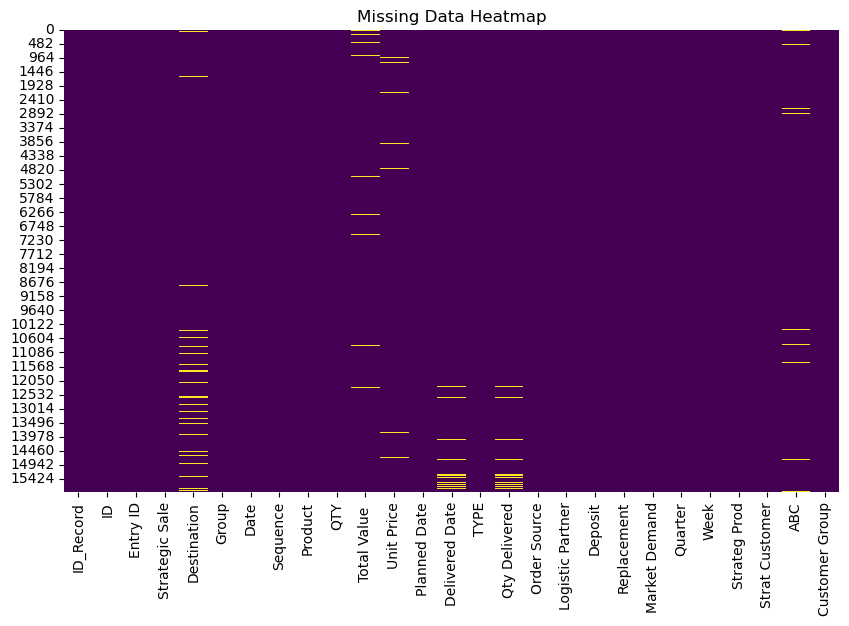

In [5]:
# Visualize Missing Data

plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
# Analyze Patterns in Missing Data

missing_data_pattern = dataset[dataset.isnull().any(axis=1)]
print(missing_data_pattern.describe())

          ID_Record           ID      Entry ID  Strategic Sale        Group  \
count   1771.000000  1771.000000   1771.000000     1771.000000  1771.000000   
mean    8888.251835  1101.332580  19962.276115        0.446640    12.895539   
std     5527.495085   315.576824    335.753404        0.497285     9.417368   
min        1.000000   340.000000  17592.000000        0.000000     1.000000   
25%     2700.500000  1140.000000  19680.500000        0.000000     2.000000   
50%    10816.000000  1160.000000  20065.000000        0.000000    11.000000   
75%    13846.500000  1320.000000  20222.000000        1.000000    21.000000   
max    15890.000000  1500.000000  20374.000000        1.000000    29.000000   

          Sequence      Product           QTY   Total Value    Unit Price  \
count  1771.000000  1771.000000   1771.000000    1519.000000  1547.000000   
mean     18.205534  4474.019198    152.820836    1271.044042     8.716394   
std      63.764384    14.983632    580.850521    5328.926

In [7]:
#Separate columns by type

numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
datetime_columns = dataset.select_dtypes(include=['datetime']).columns.tolist()

In [8]:
#Separate data

numeric_data = dataset[numeric_columns]
categorical_data = dataset[categorical_columns]
datetime_data = dataset[datetime_columns]

In [9]:
#Impute Numeric Data

imputer = KNNImputer(n_neighbors = 5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)


In [10]:
#Impute Categorical Data

for col in categorical_columns:
    mode_value = dataset[col].mode()[0]
    categorical_data[col].fillna(mode_value, inplace = True)

In [11]:
#Handle Datetime Data

for col in datetime_columns:
    datetime_data[col].fillna(method = 'ffill', inplace=True)

In [12]:
#Combine the imputed data back into a single DataFrame

data_imputed = pd.concat([numeric_data_imputed, categorical_data, datetime_data], axis=1)

In [13]:
data_imputed.isnull().sum()

ID_Record           0
ID                  0
Entry ID            0
Strategic Sale      0
Group               0
Sequence            0
Product             0
QTY                 0
Total Value         0
Unit Price          0
Qty Delivered       0
Market Demand       0
Week                0
Strateg Prod        0
Customer Group      0
Destination         0
TYPE                0
Order Source        0
Logistic Partner    0
Deposit             0
Replacement         0
Quarter             0
Strat Customer      0
ABC                 0
Date                0
Planned Date        0
Delivered Date      0
dtype: int64

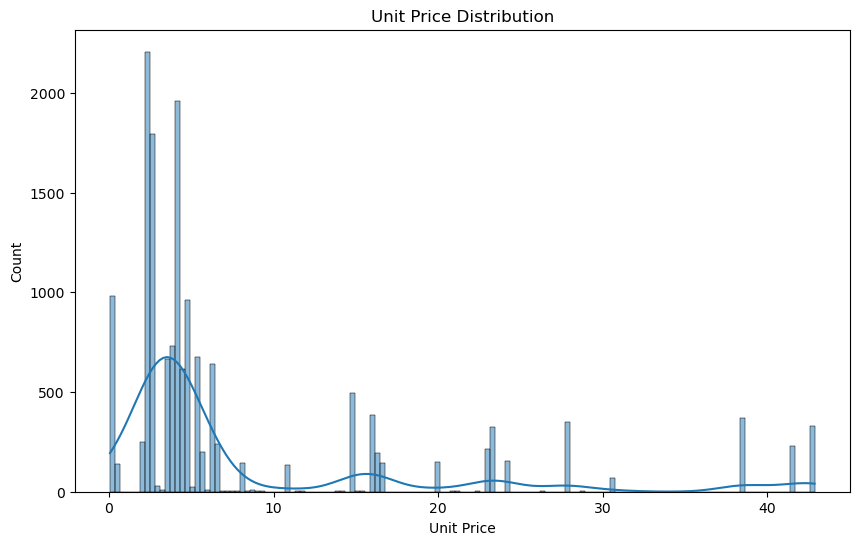

In [15]:
#Analyze Price Distribution

plt.figure(figsize = (10, 6))
sns.histplot(data_imputed['Unit Price'], kde=True)
plt.title('Unit Price Distribution')
plt.show()

In [16]:
#Use median instead of mean since data distribution is skewed

median_price = data_imputed['Unit Price'].median()
data_imputed['Unit Price'] = data_imputed['Unit Price'].replace(0, median_price)


In [18]:
#Checking for correlations or patterns in missing "ABC" values

print(data_imputed[['ABC', 'Product', 'Market Demand']].corr())

                Product  Market Demand
Product        1.000000       0.036448
Market Demand  0.036448       1.000000


In [19]:
mode_abc = data_imputed['ABC'].mode()[0]
data_imputed['ABC'] = data_imputed['ABC'].fillna(mode_abc)

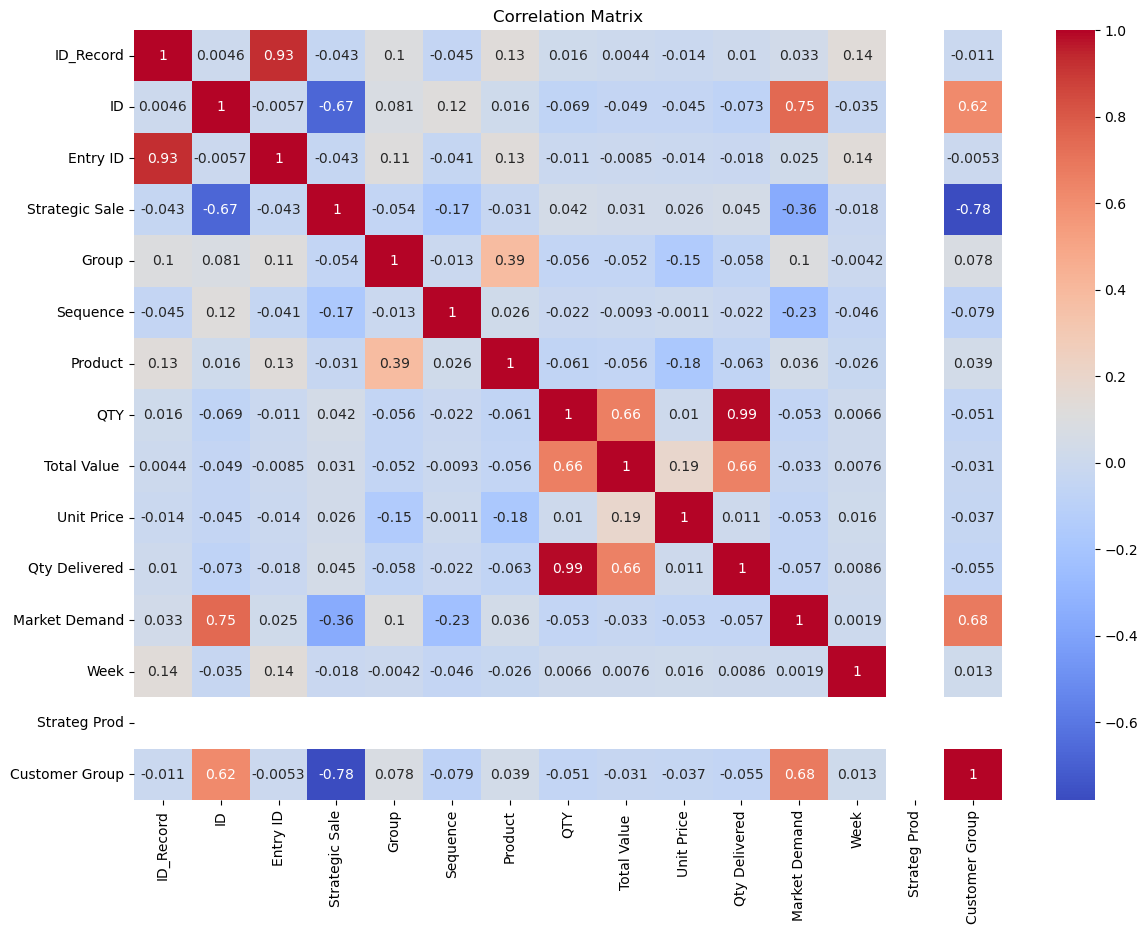

In [20]:
#Calculate Correlation Matrix

plt.figure(figsize = (14, 10))
correlation_matrix = data_imputed.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
data_imputed.dtypes

ID_Record                  float64
ID                         float64
Entry ID                   float64
Strategic Sale             float64
Group                      float64
Sequence                   float64
Product                    float64
QTY                        float64
Total Value                float64
Unit Price                 float64
Qty Delivered              float64
Market Demand              float64
Week                       float64
Strateg Prod               float64
Customer Group             float64
Destination                 object
TYPE                        object
Order Source                object
Logistic Partner            object
Deposit                     object
Replacement                 object
Quarter                     object
Strat Customer              object
ABC                         object
Date                datetime64[ns]
Planned Date        datetime64[ns]
Delivered Date      datetime64[ns]
dtype: object

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
#Identify categorical columns

categorical_columns = ['Destination', 'TYPE', 'Order Source', 'Logistic Partner', 'Deposit', 'Replacement', 'Quarter', 'Strat Customer', 'ABC']

In [31]:
for col in categorical_columns:
    data_imputed[col] = data_imputed[col].astype(str)

In [32]:
#Apply One-Hot Encoding

onehot_encoder = OneHotEncoder(sparse = False, drop = 'first')
encoded_features = onehot_encoder.fit_transform(data_imputed[categorical_columns])

In [33]:
encoded_features_df = pd.DataFrame(encoded_features, columns = onehot_encoder.get_feature_names_out(categorical_columns))

In [34]:
#Combine encoded dataframe with imputed dataframe

data_encoded = data_imputed.drop(categorical_columns, axis = 1)
data_encoded = pd.concat([data_encoded, encoded_features_df], axis = 1)


In [35]:
data_encoded.head()

,ID_Record,ID,Entry ID,Strategic Sale,Group,Sequence,Product,QTY,Total Value,Unit Price,Qty Delivered,Market Demand,Week,Strateg Prod,Customer Group,Date,Planned Date,Delivered Date,Destination_BE,Destination_DE,Destination_ES,Destination_FR,Destination_GB,Destination_GR,Destination_GU,Destination_IE,Destination_IT,Destination_NL,Destination_PT,Destination_SE,Destination_US,TYPE_SALE,Order Source_Channel2,Order Source_Channel3,Order Source_Channel4,Logistic Partner_C1,Logistic Partner_C10,Logistic Partner_C11,Logistic Partner_C12,Logistic Partner_C13,Logistic Partner_C2,Logistic Partner_C3,Logistic Partner_C4,Logistic Partner_C5,Logistic Partner_C6,Logistic Partner_C7,Logistic Partner_C8,Logistic Partner_C9,Deposit_L1,Deposit_L10,Deposit_L11,Deposit_L12,Deposit_L13,Deposit_L2,Deposit_L3,Deposit_L30,Deposit_L5,Deposit_L50,Deposit_L6,Deposit_L8,Deposit_L9,Replacement_YES,Quarter_2022Q2,Quarter_2022Q3,Quarter_2022Q4,Strat Customer_YES,Strat Customer_Yes,ABC_B,ABC_C
0,1.0,1140.0,17592.0,1.0,7.0,8.0,4482.0,325.0,112.50,0.346154,250.0,2.0,4.0,0.0,176.0,2021-01-23,2021-02-22,2023-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1140.0,17899.0,1.0,7.0,1.0,4486.0,2860.0,550.00,0.192308,2200.0,2.0,9.0,0.0,176.0,2021-05-01,2021-05-03,2023-05-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,1320.0,18072.0,0.0,2.0,77.0,4440.0,39.0,214.20,5.492308,30.0,3.0,1.0,0.0,3986.0,2021-06-26,2021-06-26,2023-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.0,340.0,18181.0,1.0,2.0,11.0,4440.0,80.6,442.68,5.492308,62.0,1.0,9.0,0.0,684.0,2021-08-02,2021-08-02,2023-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,1100.0,18335.0,1.0,7.0,2.0,4481.0,325.0,622.50,1.915385,250.0,3.0,12.0,0.0,521.0,2021-09-13,2023-07-16,2023-07-09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
#Select only numeric columns

proposed_scenario_df = data_encoded.select_dtypes(include = [np.number])

#Save the final prepared dataset to a CSV file

proposed_scenario_df.to_csv('proposed_scenario_df.csv', index=False)

In [37]:
#Load both datasets

current_data = pd.read_csv('current_scenario_df.csv')
improved_data = pd.read_csv('proposed_scenario_df.csv')

In [38]:
#Compare shapes (number of rows and columns)

print("Current Data Shape:", current_data.shape)
print("Improved Data Shape:", improved_data.shape)

Current Data Shape: (14119, 24)
Improved Data Shape: (15890, 66)


In [39]:
#Compare columns

current_columns = set(current_data.columns)
improved_columns = set(improved_data.columns)

print("Columns in Current Data but not in Improved Data:", current_columns - improved_columns)
print("Columns in Improved Data but not in Current Data:", improved_columns - current_columns)


Columns in Current Data but not in Improved Data: {'Order Source', 'Logistic Partner', 'Destination', 'Deposit', 'Strat Customer', 'TYPE', 'ABC', 'Quarter', 'Replacement'}
Columns in Improved Data but not in Current Data: {'Strat Customer_Yes', 'ABC_C', 'Logistic Partner_C1', 'Logistic Partner_C6', 'Deposit_L10', 'Destination_IE', 'Strat Customer_YES', 'Logistic Partner_C11', 'Destination_SE', 'Order Source_Channel2', 'Logistic Partner_C4', 'Destination_US', 'Destination_GU', 'Logistic Partner_C5', 'Destination_NL', 'Destination_PT', 'Logistic Partner_C10', 'Logistic Partner_C9', 'Deposit_L11', 'Deposit_L13', 'Logistic Partner_C3', 'Destination_DE', 'Logistic Partner_C12', 'Logistic Partner_C7', 'Destination_BE', 'Quarter_2022Q4', 'Logistic Partner_C8', 'Deposit_L30', 'Destination_GB', 'Deposit_L9', 'Deposit_L5', 'Destination_GR', 'Deposit_L8', 'Quarter_2022Q3', 'Destination_FR', 'Destination_IT', 'TYPE_SALE', 'Logistic Partner_C2', 'Deposit_L1', 'Deposit_L2', 'Logistic Partner_C13', '

In [40]:
#Compare basic statistics

print("Current Data Description:\n", current_data.describe())
print("Improved Data Description:\n", improved_data.describe())

Current Data Description:
           ID_Record            ID      Entry ID  Strategic Sale   Destination  \
count  14119.000000  14119.000000  14119.000000             0.0  14119.000000   
mean    7827.247043    997.706636  19954.022169             NaN      9.444082   
std     4441.390737    413.929009    231.901338             NaN      3.102325   
min        3.000000    340.000000  18072.000000             NaN      0.000000   
25%     4088.500000    340.000000  19784.000000             NaN      9.000000   
50%     7734.000000   1100.000000  19966.000000             NaN      9.000000   
75%    11588.500000   1320.000000  20138.000000             NaN     12.000000   
max    15866.000000   1500.000000  20374.000000             NaN     12.000000   

              Group      Sequence       Product           QTY   Total Value   \
count  14119.000000  14119.000000  14119.000000  14119.000000   14119.000000   
mean      14.176146     22.533607   4475.162830     71.893250     668.226924   
std